In [20]:
# trainers_dict = eval(open('../output/figure1MNIST-20190516-203439.txt', 'r').read())
# trainers_dict

# dataset_name = 'MNIST'
dataset_name = 'CIPHAR'
# dataset_name = 'Synthetic1'
# dataset_name = 'Synthetic2'


import glob
files = glob.glob("../output/figure1" + dataset_name + "*.txt")
files.sort()

filename = files[-1]

trainers_dict = eval(open(filename, 'r').read())
trainers_dict

{'Gauss': {'tr_scores': {1: [0.056608616561889646, 0.67782],
   2: [0.043628724635839465, 0.81314],
   5: [0.025363540230989457, 0.92554],
   10: [0.013957522480487823, 0.97542],
   20: [0.006983942397385836, 0.98994]},
  'te_scores': {1: [0.08055454030036927, 0.4159],
   2: [0.07848754179477692, 0.4402],
   5: [0.07568843379020691, 0.4621],
   10: [0.07426716388463973, 0.4853],
   20: [0.07621145150661468, 0.4829]},
  'lin_train_mse': 9.895349e-09,
  'lin_train_ce': 0.0,
  'lin_test_mse': 0.09888739,
  'lin_test_ce': 0.5976},
 'Laplace': {'tr_scores': {1: [0.0436466790664196, 0.83516],
   2: [0.022765643231868745, 0.99142],
   5: [0.005462824255675077, 0.99996],
   10: [0.0006692488116770983, 1.0],
   20: [2.509634199901484e-05, 1.0]},
  'te_scores': {1: [0.07538058691024781, 0.4366],
   2: [0.0692788743019104, 0.4838],
   5: [0.06707302162647247, 0.5057],
   10: [0.06610464438199996, 0.5137],
   20: [0.06602003502845764, 0.5142]},
  'lin_train_mse': 2.598726e-10,
  'lin_train_ce': 0.

CIPHAR


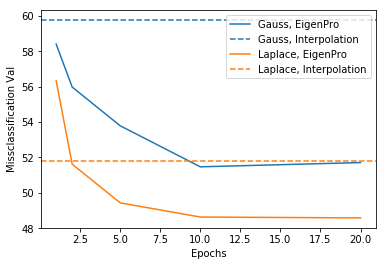

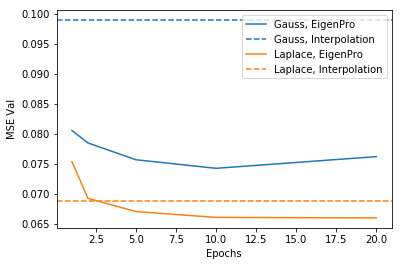

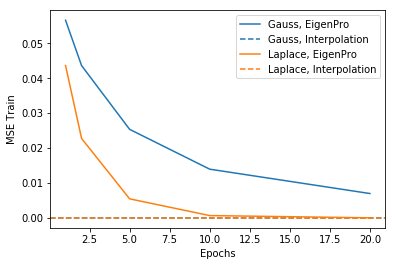

In [21]:
import matplotlib.pyplot as plt
ax = plt.gca()

print(dataset_name)

for name, trainer in trainers_dict.items():  
    
    dic = trainer['te_scores']
    
    epoch = [x for x in dic.keys()]
    mse   = [x[0] for x in dic.values()]
    miss  = [(1 - x[1]) * 100 for x in dic.values()]

    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(epoch, miss, label=name + ', EigenPro', color=color)      
    plt.axhline(y=trainer['lin_test_ce'] * 100, label=name + ', Interpolation', linestyle='--', color=color)

plt.xlabel('Epochs')
plt.ylabel('Missclassification Val')
plt.legend(loc='upper right')
        
import matplotlib2tikz
filename = '../tikz/Figure1_' + dataset_name + '_ce_test.tex'
matplotlib2tikz.save(filename)    

plt.show()

ax.set_prop_cycle(None)

for name, trainer in trainers_dict.items():  
    
    dic = trainer['te_scores']
    
    epoch = [x for x in dic.keys()]
    mse   = [x[0] for x in dic.values()]
    miss  = [x[1] for x in dic.values()]

    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(epoch, mse, label=name + ', EigenPro', color=color) 
    plt.axhline(y=trainer['lin_test_mse'], label=name + ', Interpolation', linestyle='--', color=color)
    
plt.xlabel('Epochs')
plt.ylabel('MSE Val')
plt.legend(loc='upper right')
        
import matplotlib2tikz
filename = '../tikz/Figure1_' + dataset_name + '_mse_test.tex'
matplotlib2tikz.save(filename)    

plt.show()

ax.set_prop_cycle(None)

for name, trainer in trainers_dict.items():  
    
    dic = trainer['tr_scores']
    
    epoch = [x for x in dic.keys()]
    mse   = [x[0] for x in dic.values()]
    miss  = [x[1] for x in dic.values()]

    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(epoch, mse, label=name + ', EigenPro', color=color) 
    plt.axhline(y=trainer['lin_train_mse'], label=name + ', Interpolation', linestyle='--', color=color)
    
plt.xlabel('Epochs')
plt.ylabel('MSE Train')
plt.legend(loc='upper right')
        
import matplotlib2tikz
filename = '../tikz/Figure1_' + dataset_name + '_mse_train.tex'
matplotlib2tikz.save(filename)    

plt.show()


In [22]:
del trainers_dict